In [1]:
import bagpipes as pipes
import numpy as np

Bagpipes: Latex distribution not found, plots may look strange.


In [ ]:
exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

In [ ]:
"filters/VIMOS_U"

In [2]:
test_uvj = ['pipes/filters/UVJ/Generic-Bessell.U.dat', 'pipes/filters/UVJ/Generic-Bessell.V.dat','pipes/filters/UVJ/Keck-NIRC2.J.dat'] 

In [ ]:
pwd

In [ ]:
list_filt = np.loadtxt('pipes/filters/UVJ.filt_list', dtype=str)

In [ ]:
model = pipes.model_galaxy(model_components, filt_list=list_filt)


In [ ]:
model.plot()

In [ ]:
model.sfh.plot()

In [ ]:
model.plot_full_spectrum()

In [3]:
def load_goodss(ID):
    """ Load CANDELS GOODS South photometry from the Guo et al. (2013) catalogue. """

    # load up the relevant columns from the catalogue.
    cat = np.loadtxt("hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt",
                     usecols=(10, 13, 16,
                              11, 14, 17))
    
    # Find the correct row for the object we want.
    row = int(ID) - 1

    # Extract the object we want from the catalogue.
    fluxes = cat[row, :3]
    fluxerrs = cat[row, 3:]

    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
            
    # Enforce a maximum SNR of 20, or 10 in the IRAC channels.
    for i in range(len(photometry)):
        if i < 10:
            max_snr = 20.
            
        else:
            max_snr = 10.
        
        if photometry[i, 0]/photometry[i, 1] > max_snr:
            photometry[i, 1] = photometry[i, 0]/max_snr

    return photometry

#goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")


In [4]:
# load up the relevant columns from the catalogue.
cat = np.loadtxt("hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt",
                 usecols=(10, 13, 16, 19, 25, 28, 31, 34, 37, 43, 46, 49, 52, 55,
                          11, 14, 17, 20, 26, 29, 32, 35, 38, 44, 47, 50, 53, 56))

In [ ]:
print(cat.shape)

In [5]:
goodss_filt_list = ["filters/VIMOS_U",
                    "filters/f435w",
                    "filters/f606w",
                    "filters/f775w",
                    "filters/f850lp",
                    "filters/f098m",
                    "filters/f105w",
                    "filters/f125w",
                    "filters/f160w",
                    "filters/ISAAC_Ks",
                    "filters/HAWKI_K"
                    "filters/IRAC1",
                    "filters/IRAC2",
                    "filters/IRAC3",
                    "filters/IRAC4"]

SyntaxError: EOL while scanning string literal (<ipython-input-5-c43bd084ebb7>, line 15)

In [6]:
row = int(17433) - 1

In [ ]:
# Extract the object we want from the catalogue.
fluxes = cat[row, :14]
fluxerrs = cat[row, 14:]

In [ ]:
fluxes.shape

In [ ]:
fluxerrs.shape

In [ ]:
#Makes a 2D array using the input arrays as the columns
#ie column 1 = fluxes, column2 = fluxerrs
np.c_

In [ ]:
# Turn these into a 2D array.
photometry = np.c_[fluxes, fluxerrs]

In [ ]:
# blow up the errors associated with any missing fluxes.

#going through the rows of the 2D arrays
for i in range(len(photometry)):
    #If flux ==0 or error = negative
    if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
        #make the whole row [zero flux, huge error]
        photometry[i,:] = [0., 9.9*10**99.]

In [ ]:


# Find the correct row for the object we want.
row = int(ID) - 1

# Extract the object we want from the catalogue.
fluxes = cat[row, :14]
fluxerrs = cat[row, 14:]

# Turn these into a 2D array.
photometry = np.c_[fluxes, fluxerrs]

# blow up the errors associated with any missing fluxes.
for i in range(len(photometry)):
    if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
        photometry[i,:] = [0., 9.9*10**99.]

# Enforce a maximum SNR of 20, or 10 in the IRAC channels.
for i in range(len(photometry)):
    if i < 10:
        max_snr = 20.

    else:
        max_snr = 10.
    
    #flux/flux_err > max_snr
    if photometry[i, 0]/photometry[i, 1] > max_snr:
        
        #the error column will be flux/max_snr 
        photometry[i, 1] = photometry[i, 0]/max_snr

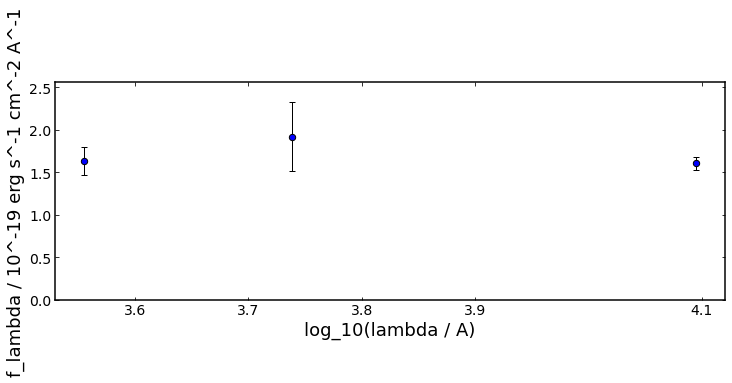

In [7]:
galaxy = pipes.galaxy("17433", load_goodss, spectrum_exists=False, filt_list=test_uvj)

fig = galaxy.plot()

In [8]:
#defining the SFH Model we want to fit
exp = {}                                  # Tau-model star-formation history component
exp["age"] = (0.1, 15.)                   # Vary age between 100 Myr and 15 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

#defining the dust component for the model
dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#giving the instruction to bagpipes for
#fitting the model
fit_instructions = {}                     # The fit instructions dictionary
fit_instructions["redshift"] = (0., 10.)  # Vary observed redshift from 0 to 10
fit_instructions["exponential"] = exp   
fit_instructions["dust"] = dust


In [ ]:
import time as time

In [10]:
#this is making the model
fit = pipes.fit(galaxy, fit_instructions)

#start = time.time()
#this is the code that fits the model 
fit.fit(verbose=False)
#end = time.time()

#time_elapsed = (end-start)/60

#print('Total time to run: %.1f minutes' %(time_elapsed))


Bagpipes: fitting object 17433


Completed in 75.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
dust:Av                        0.562      1.065      1.326
exponential:age                1.069      2.620      6.389
exponential:massformed         8.396      9.016     10.501
exponential:metallicity        0.566      1.403      2.101
exponential:tau                2.800      5.812      8.464
redshift                       0.280      0.507      1.978




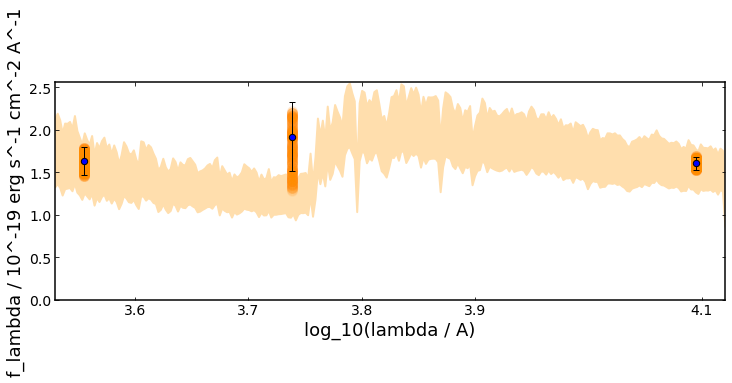

In [11]:
fig = fit.plot_spectrum_posterior(save=False, show=True)

In [ ]:
from astropy.io import fits

In [ ]:
hdu = fits.open('cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat.FITS')

In [ ]:
data = hdu[1].data

In [ ]:
type(data[0])

In [ ]:
hdu[1].header

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats as stats

In [ ]:
stats.describe(data['f_f160w'])

In [ ]:
[id x y ra dec faper_F160W eaper_F160W faper_F140W eaper_F140W f_F160W e_F160W w_F160W f_U 
    e_U w_U f_B e_B w_B f_G e_G w_G f_V e_V w_V f_F606W e_F606W w_F606W f_R e_R w_R f_Rp e_Rp w_Rp 
    f_I e_I w_I f_Ip e_Ip w_Ip f_F814W e_F814W w_F814W f_Z e_Z w_Z f_Zp e_Zp w_Zp 
    f_UVISTA_Y e_UVISTA_Y w_UVISTA_Y f_F125W e_F125W w_F125W f_J1 e_J1 w_J1 f_J2 e_J2 w_J2 
    f_J3 e_J3 w_J3 f_J e_J w_J f_UVISTA_J e_UVISTA_J w_UVISTA_J f_F140W e_F140W w_F140W 
    f_H1 e_H1 w_H1 f_H2 e_H2 w_H2 f_H e_H w_H f_UVISTA_H e_UVISTA_H w_UVISTA_H f_K e_K w_K 
    f_Ks e_Ks w_Ks f_UVISTA_Ks e_UVISTA_Ks w_UVISTA_Ks f_IRAC1 e_IRAC1 w_IRAC1 f_IRAC2 e_IRAC2 w_IRAC2
    f_IRAC3 e_IRAC3 w_IRAC3 f_IRAC4 e_IRAC4 w_IRAC4 f_IA427 e_IA427 f_IA464 e_IA464 f_IA484 e_IA484 
    f_IA505 e_IA505 f_IA527 e_IA527 f_IA574 e_IA574 f_IA624 e_IA624 f_IA679 e_IA679 f_IA709 e_IA709 
    f_IA738 e_IA738 f_IA767 e_IA767 f_IA827 e_IA827 tot_cor wmin_ground wmin_hst wmin_irac wmin_wfc3 
    z_spec star_flag  kron_radius a_image b_image theta_J2000 class_star flux_radius fwhm_image flags 
    IRAC1_contam IRAC2_contam IRAC3_contam IRAC4_contam contam_flag f140w_flag use_phot near_star 
    nexp_f125w nexp_f140w nexp_f160w]

In [ ]:
data[['f_f160w', 'f_f140w']]

In [ ]:
for i in ['e_f160w', 'e_f140w']:
    print(data[i])
    
    print()
    print('---------')
    print()

In [ ]:
data[0]['f_f160w']

In [ ]:
def Flux_Conversion(F):
    
    num = (25 - 8.9)/2.5
    
    f_nu_jnsky = F * 10**(-num) #jsky
    
    return f_nu_jnsky * 1e-6

In [ ]:
def load_phot(ID):
    
    row = int(ID) - 1
    
    # Find the correct row for the object we want.
    row = int(ID) - 1
    
    cat = fits.getdata('cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat.FITS')
    
    # Extract the object we want from the catalogue.
    fluxes = []
    fluxerrs = []
    
    filters = ['f140w', 'f160w', 'f606w', 'f814w', 'irac1', 'irac2', 'irac3', 'irac4']
    
    for i in filters:
        
        f = cat[row]['f_'+i]
        f_e = cat[row]['e_'+i]
        
        f_conv = Flux_Conversion(f)
        f

In [ ]:
def load_phot(ID):
    
    row = int(ID) - 1
    
    # Find the correct row for the object we want.
    row = int(ID) - 1
    
    cat = fits.getdata('cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat.FITS')
    
    # Extract the object we want from the catalogue.
    fluxes = []
    fluxerrs = []
    
    filters = ['f140w', 'f160w', 'f606w', 'f814w', 'irac1', 'irac2', 'irac3', 'irac4']
    
    for i in filters:
        
        f = cat[row]['f_'+i]
        f_e = cat[row]['e_'+i]
        
        fluxes.append(f)
        fluxerrs.append(f_e)

    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]
    
    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
        else:
            photometry[i,:] = [Flux_Conversion(photometry[i, 0]), Flux_Conversion(photometry[i, 1])]
            
    # Enforce a maximum SNR of 20, or 10 in the IRAC channels.
    for i in range(len(photometry)):
        if i < 10:
            max_snr = 20.
            
        else:
            max_snr = 10.
        
        if photometry[i, 0]/photometry[i, 1] > max_snr:
            photometry[i, 1] = photometry[i, 0]/max_snr

    return photometry

In [ ]:
load_phot(243)

In [ ]:
path = 'pipes/filters/'
test_filt = [path +'/HST_Filters/wfc_f140w.txt', path +'/HST_Filters/wfc_f160w.txt', path +'/HST_Filters/ACS_f606w.txt', 
             path +'/HST_Filters/ACS_f814w.txt', path +'/IRAC_Filters/IRAC_36_filt.txt', path +'/IRAC_Filters/IRAC_45_filt.txt', 
            path +'/IRAC_Filters/IRAC_58_filt.txt', path +'/IRAC_Filters/IRAC_80_filt.txt']

In [ ]:
galaxy = pipes.galaxy(243, load_phot, spectrum_exists=False, filt_list=test_filt)

fig = galaxy.plot()

In [ ]:
#defining the SFH Model we want to fit
exp = {}                                  # Tau-model star-formation history component
exp["age"] = (0.1, 15.)                   # Vary age between 100 Myr and 15 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

#defining the dust component for the model
dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#giving the instruction to bagpipes for
#fitting the model
fit_instructions = {}                     # The fit instructions dictionary
fit_instructions["redshift"] = (0., 10.)  # Vary observed redshift from 0 to 10
fit_instructions["exponential"] = exp   
fit_instructions["dust"] = dust

In [ ]:
fit = pipes.fit(galaxy, fit_instructions)
fit.fit(verbose=False)

In [ ]:
fig = fit.plot_spectrum_posterior(save=False, show=True)

In [ ]:
import pandas as pd

In [ ]:
path_z = 'cosmos_3dhst.v4.1.cats/Eazy/cosmos_3dhst.v4.1.zout'

In [ ]:
path_cat = 'cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat'

In [ ]:
data_cat = np.genfromtxt(path_cat)

In [ ]:
data_cat.shape

In [ ]:
columns = np.loadtxt('column_names.txt', dtype=str)

In [ ]:
columns.shape

In [ ]:
df = pd.DataFrame(data = data_cat, columns = columns)

In [ ]:
df.columns

In [ ]:
reduced_df = df[['f_F606W', 'e_F606W', 'f_F814W', 'e_F814W', 'f_F140W', 'e_F140W', 'f_F160W', 'e_F160W', 
                 'f_IRAC1', 'e_IRAC1', 'f_IRAC2', 'e_IRAC2', 'f_IRAC3', 'e_IRAC3', 'f_IRAC4', 'e_IRAC4']]

In [ ]:
reduced_df.loc[0]['f_F606W']

In [ ]:
def correct_flux(flux):
    
    if flux < 0:
        return -99
    else:
        
        exponent = (25 - 8.9)/2.5
        conv = 10** (-exponent)
        proper_flux = flux * conv * 1e6
        
        return proper_flux

In [ ]:
correct_flux(reduced_df['f_F814W'][0])

In [ ]:
filters = np.array(['f_F606W', 'f_F814W', 'f_F140W', 'f_F160W', 'f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4',
           'e_F606W', 'e_F814W', 'e_F140W', 'e_F160W', 'e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4'])

In [ ]:
for i in filters:
    print('e' in i)

In [ ]:
def load_data(ID):
    
    row = int(ID) - 1
    
    flux = []
    flux_err = []
    
    for filt in filters:
        
        if 'e_' in filt:
            f_obs = reduced_df.loc[row][filt]
            proper_f = correct_flux(f_obs)
            flux_err.append(proper_f)
        else:
            f_obs = reduced_df.loc[row][filt]
            proper_f = correct_flux(f_obs)
            flux.append(proper_f)
            
            
    phot_2d_arr = np.c_[flux, flux_err]
    
    for idx in range(len(phot_2d_arr)):
        if phot_2d_arr[idx][0] < 0 or phot_2d_arr[idx][1] < 0:
            phot_2d_arr[idx] = np.array([0, 9e99]) 
    
    return phot_2d_arr

In [ ]:
load_data(542)

In [ ]:
path = 'pipes/filters/'
test_filt = [path +'/HST_Filters/ACS_f606w.txt', path +'/HST_Filters/ACS_f814w.txt', path +'/HST_Filters/wfc_f140w.txt', path +'/HST_Filters/wfc_f160w.txt', 
             path +'/IRAC_Filters/IRAC_36_filt.txt', path +'/IRAC_Filters/IRAC_45_filt.txt', path +'/IRAC_Filters/IRAC_58_filt.txt', path +'/IRAC_Filters/IRAC_80_filt.txt']

In [ ]:
galaxy = pipes.galaxy(321, load_data, spectrum_exists=False, filt_list = test_filt)

In [ ]:
galaxy.plot()

In [ ]:
path_z

In [ ]:
data_z = np.loadtxt(path_z, usecols = (0, 1, 17))

In [ ]:
data_z[321]

In [ ]:
#Model Building
model_constant = {}
model_constant['age_max'] = (.5, 2)
model_constant['age_min'] = (3, 4)
model_constant["metallicity"] = (0., 2.5)   
model_constant["massformed"] = (1., 13.)           

fit_instructions = {}
fit_instructions['constant'] = model_constant
fit_instructions['redshift'] = (0., 10)

In [ ]:
fit = pipes.fit(galaxy, fit_instructions)

In [ ]:
fit.fit(verbose=None)

In [ ]:
fig = fit.plot_spectrum_posterior(save=False, show=True)

In [ ]:
fig = fit.plot_sfh_posterior(save=False, show=True)

In [ ]:
fig = fit.plot_corner(save=False, show=True)

In [ ]:
def fitting_model_burst(min_age, max_age, low_Z = 0, high_Z = 0, fitting = True, metal = False, mass_formed = False):
    
    #here the model assumes a uniform probability distribution between the high and low parameter values specified
    
    if fitting and metal and mass_formed:
        
        burst = {}
        burst['age'] = (min_age, max_age) #ages have to be in Gyr
        burst['metallicity'] = (low_Z, high_Z) #solar metalicity values here will vary between low and high Z
        burst['mass_formed'] = (low_mass, high_mass) #this will be in log10(M) values
        
        return burst
    
    elif fitting and metal:
        
        burst = {}
        burst['age'] = (min_age, max_age) #ages have to be in Gyr
        burst['metallicity'] = (low_Z, high_Z)
        return burst
    
    if fitting:
        
        burst = {}
        burst['age'] = (min_age, max_age) #ages have to be in Gyr
        
        return burst   

In [ ]:
def fitting_model_constant(age_start_low, age_start_high, age_end_low, age_end_high, low_Z, high_Z, form_M_low, form_M_high, fitting = True, metal=False, mass_formed=False):
    
    if fitting and metal and mass_formed:
        
        model_constant = {}
    
        model_constant['age_max'] = (age_start_low, age_start_high) #time since SF tunred on: Gyr
        model_constant['age_min'] = (age_end_low, age_end_high) #time since SF tunred off: Gyr

        model_constant['metallicity'] = (low_Z, high_Z) #range of solar metallicity
        model_constant['mass_formed'] = (form_M_low, form_M_high) #range of mass formed
        
        return model_constant
    
    elif fitting and metal:
        
        model_constant = {}
    
        model_constant['age_max'] = (age_start_low, age_start_high) #time since SF tunred on: Gyr
        model_constant['age_min'] = (age_end_low, age_end_high) #time since SF tunred off: Gyr

        model_constant['metallicity'] = (low_Z, high_Z) #range of solar metallicity
        
        return model_constant
    
    if fitting:
        
        model_constant = {}
    
        model_constant['age_max'] = (age_start_low, age_start_high) #time since SF tunred on: Gyr
        model_constant['age_min'] = (age_end_low, age_end_high) #time since SF tunred off: Gyr
        
        return model_constant 